In [1]:
import os, json
import numpy as np

# walk = sorted(os.walk("."), key=lambda x: x[0])[::-1]
# for dirpath, dirnames, filenames in walk:
#     if "testingSetScores.json" in filenames:
#         data = json.load(open(os.path.join(dirpath, "testingSetScores.json"), "r"))
#         # sort data
#         data = dict(sorted(data.items(), key=lambda x: x[1]["ID"]))
#         deltas = []
#         for k in data:
#             initial_prompt_score = list(data[k]["initial_prompt"].values())[0]
#             optimized_prompt_score = list(data[k]["optimized_prompt"].values())[0]
#             delta = optimized_prompt_score - initial_prompt_score
#             deltas.append(delta)
            
#         print(deltas)
#         avg_change = sum(deltas) / len(deltas)
#         print(f"Avg change: {dirpath}: {avg_change}")
        
        
with open("testingSetScores.json", "r") as f:
    data = json.load(f)
    deltas = []
    for k in data:
        initial_prompt_score = list(data[k]["initial_prompt"].values())[0]
        optimized_prompt_score = list(data[k]["optimized_prompt"].values())[0]
        delta = optimized_prompt_score - initial_prompt_score
        deltas.append(delta)
        
    print(deltas)
    avg_change = np.mean(deltas)
    std = np.std(deltas)
    ci = 1.96 * std / np.sqrt(len(deltas))
    print(f"Avg change: {avg_change}")
    print(f"Std: {std}")
    print(f"95% CI: {ci}")
    
    # Plot the points on a vertical line with the confidence interval
    # import matplotlib.pyplot as plt
    # xs = np.zeros(len(deltas))
    # plt.figure()
    # plt.errorbar(xs, deltas, yerr=ci, fmt='o')
    # plt.show()

[20.218534641985322, -0.04268756991977796, 2.6524506042245104, 17.278296220286137, 8.520250762506159, 5.2640766025682595, 45.06806631094145, 1.9385279894187875, 4.8618158560824725, 7.958688466463256, 10.531627046198556, -2.2173291685468257, 13.96436241848696, 29.63471543258995, 52.5939888839518, 5.0700283983498196, -0.043104657972342864, 2.6181378511857574, 5.272631814872232, 2.4046055524530914, 4.034639164466768, 0.13851157741176934, 13.903246313755062, -0.231008364580358, 39.32175313104199, 10.10176566865593, 34.85581439469341, 4.015156814944927, 48.93188874176203, 63.08144702362315, 10.31796453238687, 4.0201245864388255, 1.3896493220306354, 6.19812917034379, 5.912663636264455, 0.007729454477136244]
Avg change: 13.320754406217835
Std: 16.85757803049927
95% CI: 5.506808823296428


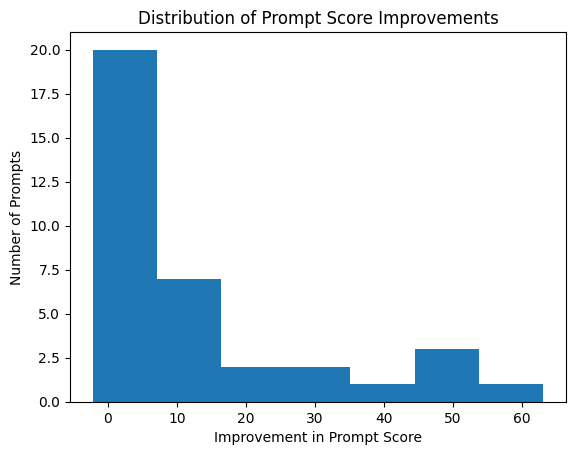

In [2]:
import matplotlib.pyplot as plt
plt.hist(deltas, bins=7)
plt.xlabel("Improvement in Prompt Score")
plt.ylabel("Number of Prompts")
plt.title("Distribution of Prompt Score Improvements")
plt.show()

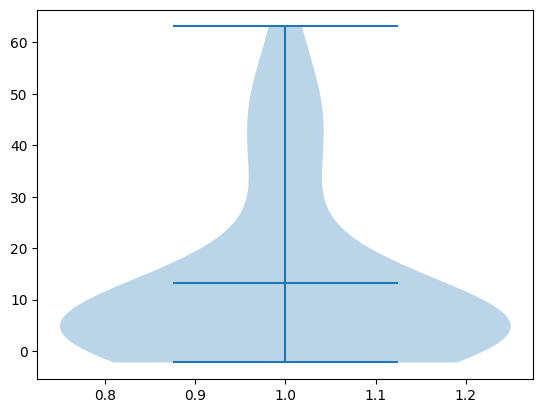

In [3]:
import matplotlib.pyplot as plt
plt.figure()
plt.violinplot(deltas, showmeans=True)
plt.show()